# CASE STUDY ON SALES PRICE OF BUILDING
1.	dayhours: Date house was sold
2.	price: Price is prediction target
3.	room_bed: Number of Bedrooms/House
4.	room_bath: Number of bathrooms/bedrooms description, quarter bath,half-bath, three-quarter
5.	living_measure: square footage of the home
6.	lot_measure: square footage of the lot that means the total house 
7.	ceil: Total floors (levels) in house
8.	coast: House which has a view to a waterfront
9.	sight: Has been viewed
10.	condition: How good the condition is (Overall)
11.	quality: grade given to the housing unit, based on grading system
12.	ceil_measure: square footage of house apart from basement
13.	basement_measure: square footage of the basement
14.	yr_built: Built Year
15.	yr_renovated: Year when house was renovated
16.	zipcode: zip
17.	lat: Latitude coordinate
18.	long: Longitude coordinate
19.	living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
20.	lot_measure15: lotSize area in 2015(implies-- some renovations)
21.	furnished: Based on the quality of room 23: total_area: Measure of both living and lot


### Loading Libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore,norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Collect and Load Data

In [3]:
house=pd.read_csv('innercityn.csv')

### Data Description

In [4]:
house.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,City,lat,long,living_measure15,lot_measure15,furnished,Region,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,Seattle,47.7174,-122.336,2120,7553,1,North West,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,Federal Way,47.3165,-122.386,2260,8800,0,South West,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,Maple Valley,47.3515,-121.999,2370,4348,0,South East,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,Seattle,47.7049,-122.349,1520,3844,0,North West,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,Seattle,47.6768,-122.269,1900,5940,0,North West,5450


### Check the number of samples and features

In [5]:
house.shape

(21613, 25)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
City                21613 non-null object
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       

In [7]:
house.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'City', 'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'Region', 'total_area'],
      dtype='object')

In [8]:
#Check the null values
house.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
City                0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
Region              0
total_area          0
dtype: int64

### Check Duplicate values

In [9]:
#Checking the duplicated values
house.duplicated().sum() #The output states that there is no duplicated values in the rows

0

## Data Cleaning

#### Use DatetimeIndex.date attribute to find the date part of the DatetimeIndex object.

In [10]:
house['year_sold'] = pd.DatetimeIndex(house['dayhours']).year
house['month'] = pd.DatetimeIndex(house['dayhours']).month
house['day'] = pd.DatetimeIndex(house['dayhours']).day
house['time'] = pd.DatetimeIndex(house['dayhours']).time
house.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,City,lat,long,living_measure15,lot_measure15,furnished,Region,total_area,year_sold,month,day,time
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,Seattle,47.7174,-122.336,2120,7553,1,North West,16477,2014,11,7,00:00:00
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,Federal Way,47.3165,-122.386,2260,8800,0,South West,10050,2014,12,4,00:00:00
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,Maple Valley,47.3515,-121.999,2370,4348,0,South East,6694,2015,4,20,00:00:00
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,Seattle,47.7049,-122.349,1520,3844,0,North West,4664,2014,5,29,00:00:00
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,Seattle,47.6768,-122.269,1900,5940,0,North West,5450,2015,4,24,00:00:00


- From the above table, so we can also drop 'dayhours' as we have splitted them to build new columns Year,Month,Day and time,we can see the time columns have zero values,so drop it

In [11]:
house.drop(columns='dayhours',axis=1,inplace=True)
house.drop(columns='time',axis=1,inplace=True)

In [12]:
house.drop(columns='cid',axis=1,inplace=True)

### Adding new feature 'age' of house during purchase year of house

In [13]:
house['age'] = house['year_sold'] - house['yr_built']

In [14]:
house.drop(columns='yr_built',axis=1,inplace=True)

In [15]:
house['rage']=house['year_sold']-house['yr_renovated']

In [16]:
house.drop(columns=['yr_renovated','year_sold','day'],axis=1,inplace=True)
house.drop('zipcode',axis=1,inplace=True) #Already we extracted region column from zipcode

In [17]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
City                21613 non-null object
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           21613 non-null int64
Region              21613 non-null object
total_area          21613 non-null int64
month               21613 non-null int64
age                 

In [18]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
room_bed,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
room_bath,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
living_measure,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
lot_measure,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
ceil,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
coast,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
sight,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
quality,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


### Changing the integer features to actual categorical variables

In [19]:
house[['room_bed','ceil','coast','sight','condition','quality','furnished','room_bath','age','rage']]=house[['room_bed','ceil','coast','sight','condition','quality','furnished','room_bath','age','rage']].astype('object')

### Pull Out Numerical Features and Apply Z-Score

In [20]:
num_cols=house.select_dtypes(['int64','float64']).columns
num_cols1=num_cols[1:-1]
num_cols1

Index(['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'lat',
       'long', 'living_measure15', 'lot_measure15', 'total_area'],
      dtype='object')

### Check the data correlation using heatmap

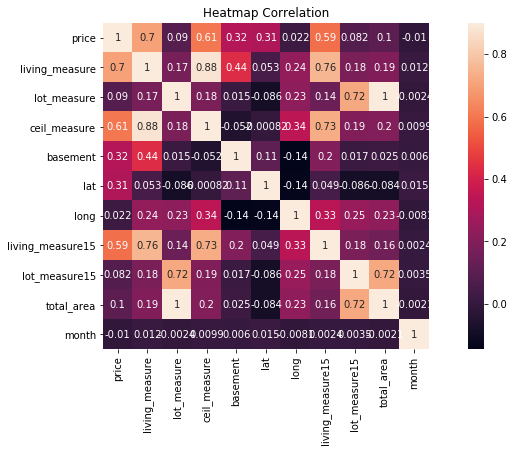

In [21]:
plt.figure(figsize=[14,6])
sns.heatmap(DataFrame(house.corr()),vmax=0.9,square=True,annot=True)
plt.title('Heatmap Correlation')
plt.show()

# Exploratory Data Analysis (EDA):

### Univariate Analysis for Continuous

We are taking a proximate look at the label column of the dataset, the "price" as our predictable variable.
<linegape>
We calculate the summary statistics, including the minimum and maximum value, the mean, the median and 
<linegape>
the standard deviation. The distribution can be visualized by a histogram.

In [22]:
house["price"].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [23]:
#Checking the skewness of the predictable variable

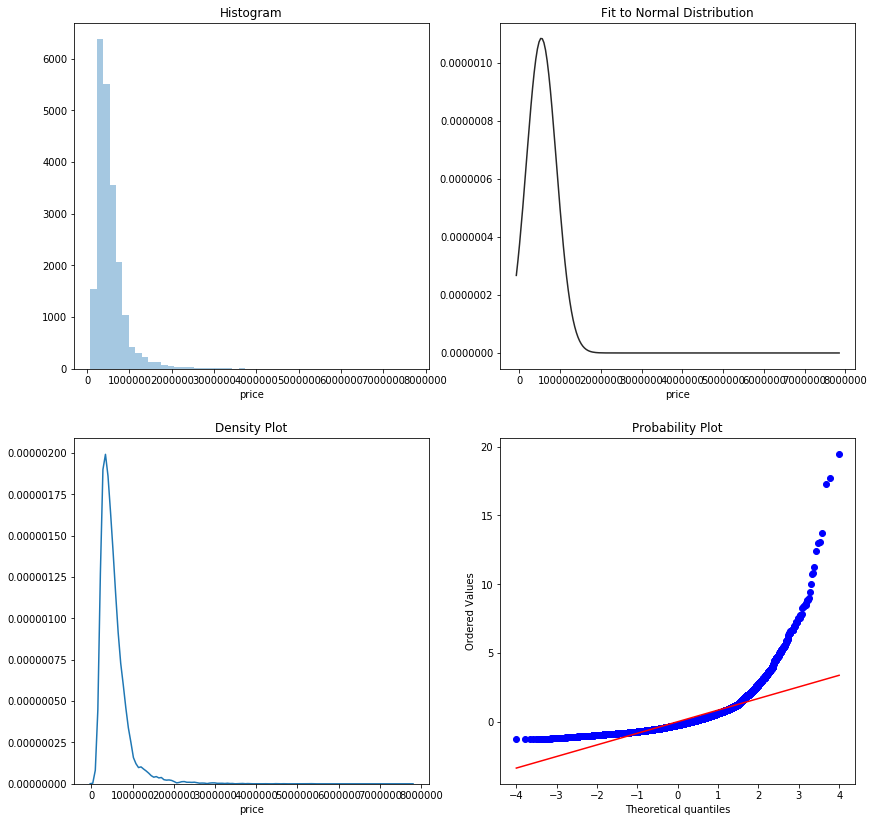

In [24]:
#create subplot
fig,ax=plt.subplots(2,2,figsize=(14,14))

#Create a histogram for 'price' 
sns.distplot(house['price'],kde=False,ax=ax[0,0])
ax[0,0].set_title('Histogram')

#Create the fitted paramter by function
sns.distplot(house['price'],kde=False,hist=False,fit=norm,ax=ax[0,1])
ax[0,1].set_title('Fit to Normal Distribution')

#Create the distribution plot
sns.distplot(house['price'],hist=False,ax=ax[1,0])
ax[1,0].set_title('Density Plot')

#Create a probability plot or Q-Q plot
#In statistics, a Q–Q plot is a probability plot, which is a graphical method for comparing two
#probability distributions by plotting their quantiles against each other.
stats.probplot(zscore(house['price']),dist=norm,plot=plt)

plt.show()

#

     The above histogram plot indicates that the distribution of the Price exhibits
     a positive skewness (right skewed) and that the peakedness deviates from normal distribution. 
     The skewness can be visualized by a probability plot of the Price against the quantiles 
     of the normal  distribution.



### Univariate Analysis for the rest of the conitnuos variables

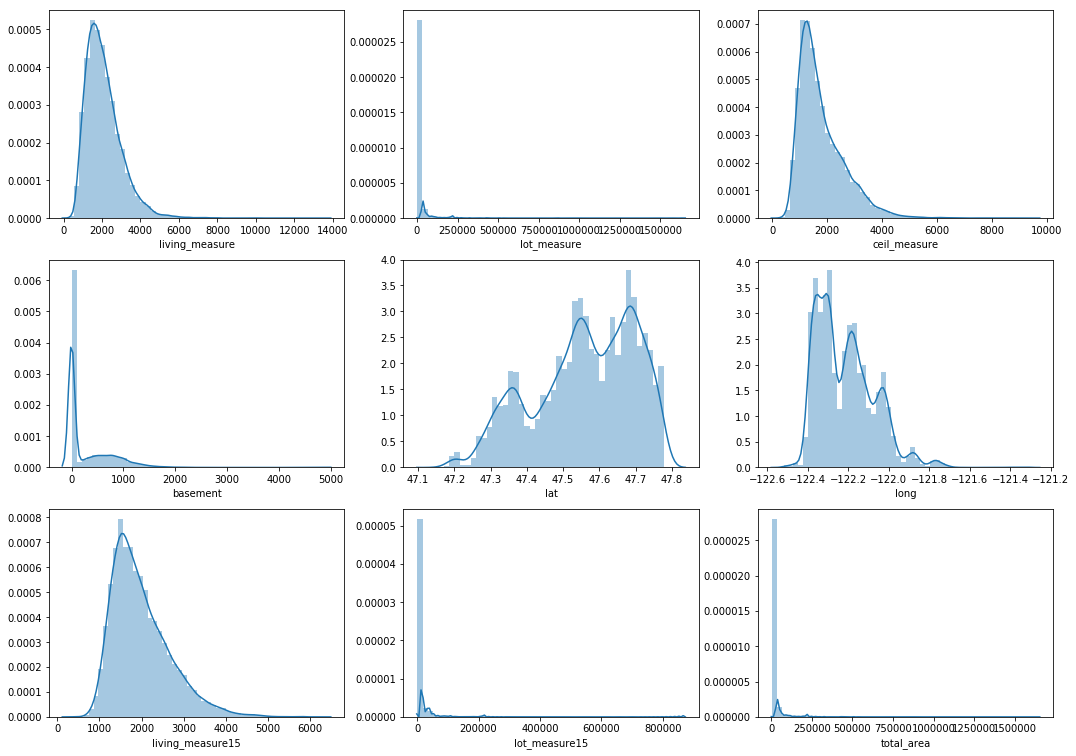

In [25]:
fig,ax = plt.subplots(3,3,figsize=(18,13))
i,j=0,0,
for col in num_cols1:
    sns.distplot(house[col],ax=ax[i,j])
    j=(j+1)%3
    if j==0:i=i+1
plt.show()

#We can see that many features like lot_measure,lot_measure15 like with continuous values do not exhibit normal distributions.We will try to improve the skewness of these features in order to fit the dataset.

### Univariate Analysis for Categorical columns

In [26]:
cat_cols=house.select_dtypes('object').columns
cat_cols1=['room_bed','room_bath','ceil','coast','sight','condition','quality','furnished']
cat_cols1

['room_bed',
 'room_bath',
 'ceil',
 'coast',
 'sight',
 'condition',
 'quality',
 'furnished']

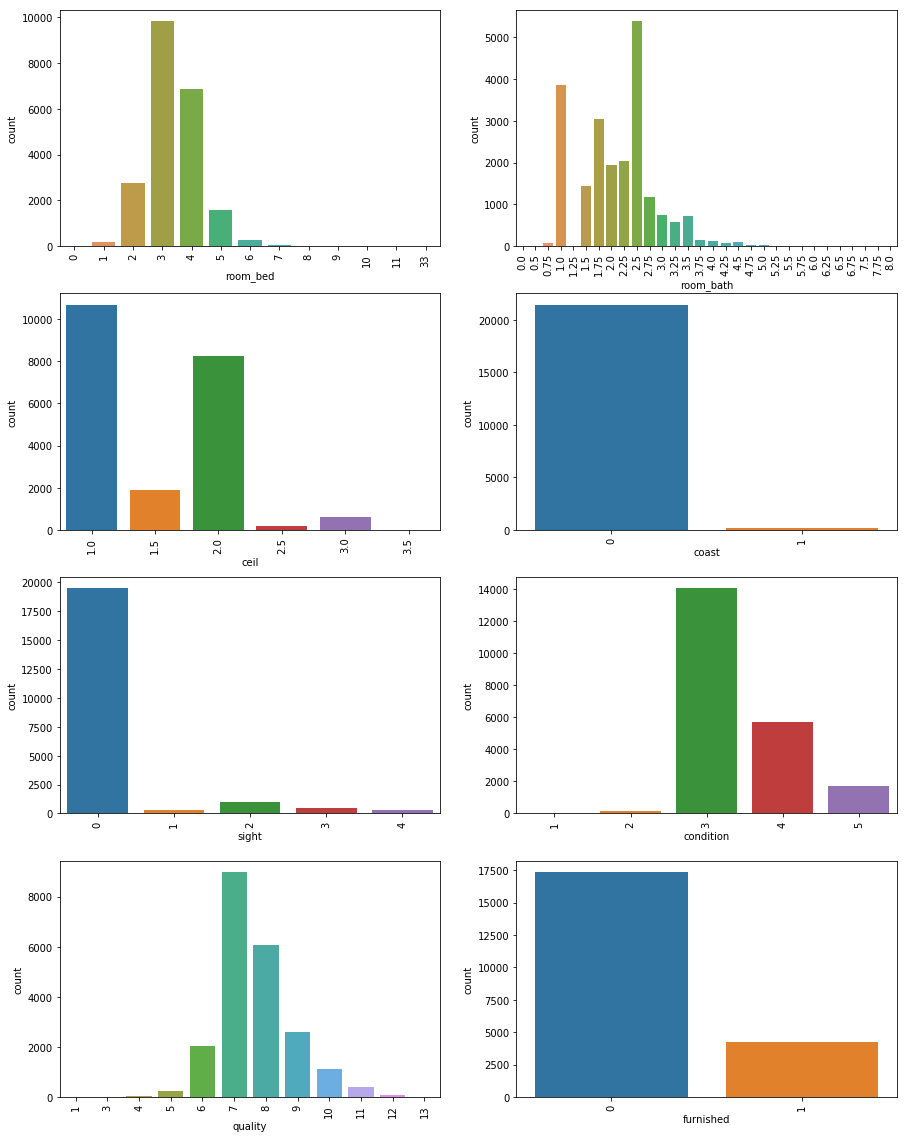

In [27]:
#Count plots for categorical columns

fig, ax = plt.subplots(4,2, figsize=(15,20))
for col, subplot in zip(cat_cols1, ax.flatten()):
    sns.countplot(house[col], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Bivariate Analysis

In this part we will look into the relationship between the label and the features. Therefore we will plot scatter plots for the numerical features in dependence of the label and boxplots for the categorical features in dependence of the label. Afterwards we will look at the correlations between all numerical columns.


In [28]:
#Scatter plot of the most correlated features with price
num_cols1

Index(['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'lat',
       'long', 'living_measure15', 'lot_measure15', 'total_area'],
      dtype='object')

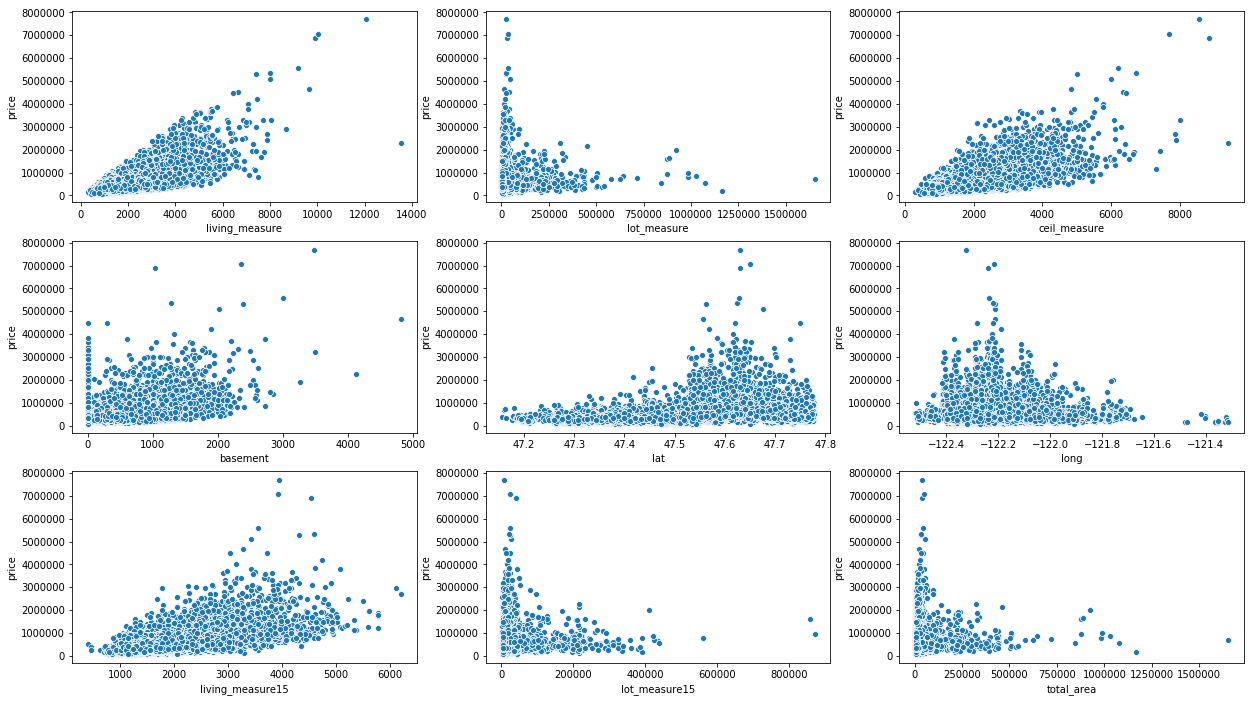

In [29]:
fig,ax = plt.subplots(3,3,figsize=(21,12))
i,j=0,0,
for col in num_cols1:
    sns.scatterplot(y=house['price'],x=house[col],ax=ax[i,j])
    j=(j+1)%3
    if j==0:i=i+1
plt.show()        

### EDA Analysis Using Boxplot

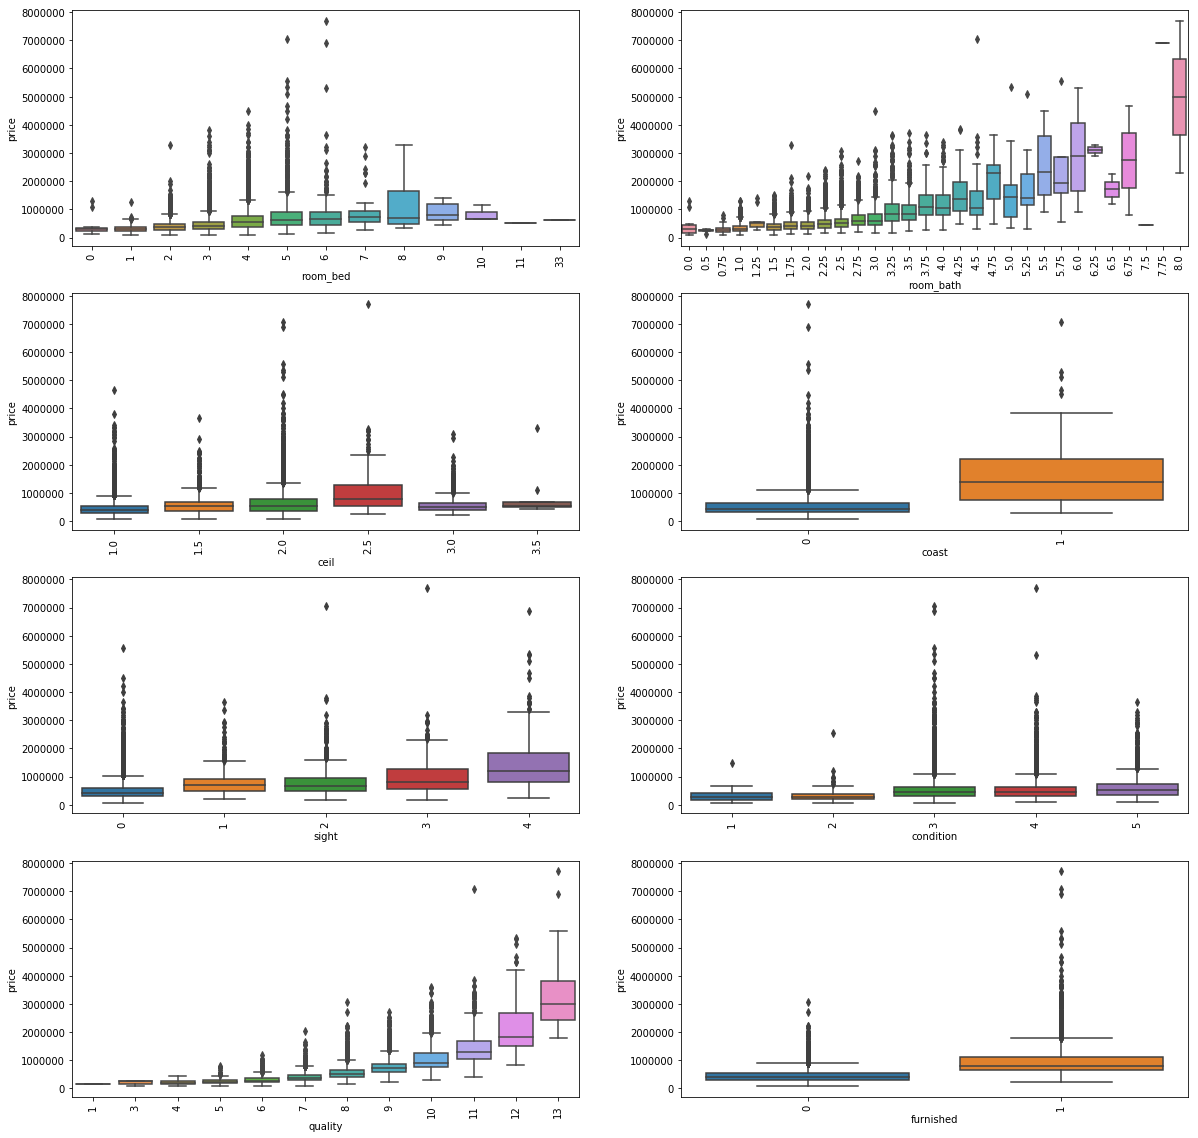

In [30]:

fig, ax = plt.subplots(4,2, figsize=(20,20))
i,j=0,0,
for col, subplot in zip(cat_cols1, ax.flatten()):
    sns.boxplot(y=house['price'],x=house[col],ax=ax[i,j])
    j=(j+1)%2
    if j==0:i=i+1
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the datasets and a variable y equal to the "price" column. **

In [31]:
y=house["price"]
X=house.drop(['price','City','Region'],axis=1)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)

## Training the  Base- Model
Now its time to train our model on our training data!

In [34]:
from sklearn.linear_model import LinearRegression
LM=LinearRegression()

In [35]:
LM.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predicting Test Data & Evaluating the Model
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

** Calculating the Accuracy score, Mean Squared Error, and the Root Mean Squared Error. 

In [36]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [37]:
y_pred=LM.predict(X_train)
y_predict=LM.predict(X_test)
score=LM.score(X_train,y_train)
score1=LM.score(X_test,y_test)
mse=mean_squared_error(y_pred,y_train)
mse1=mean_squared_error(y_predict,y_test)

In [38]:
print('Test Accuracy:')
print('The Traning accuracy is {}'.format(score))
print('The Test accuracy is {}'.format(score1))
print('MSE for training is {}'.format(mse))
print('MSE for test is {}'.format(mse1))
print('R^2 =',r2_score(y_predict,y_test))
print("The  TRAIN RMSE for Linear Regression is",np.sqrt(mse))
print("The TEST RMSE for Linear Regression is",np.sqrt(mse1))

Test Accuracy:
The Traning accuracy is 0.6940281496620688
The Test accuracy is 0.702481442463573
MSE for training is 41952910616.37358
MSE for test is 38631981997.9065
R^2 = 0.5814505356126105
The  TRAIN RMSE for Linear Regression is 204824.09676689308
The TEST RMSE for Linear Regression is 196550.2022331865


## Correct Feature Skewness cleansing outliers

In [39]:
num_cols1

Index(['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'lat',
       'long', 'living_measure15', 'lot_measure15', 'total_area'],
      dtype='object')

In [40]:
#Exrtacting numerical features to house_num dataframe
house_num=house[num_cols1]

In [41]:
#Applying zscore to numerical features
house_num[num_cols1]=house_num[num_cols1].apply(zscore)
house_num.head()

,living_measure,lot_measure,ceil_measure,basement,lat,long,living_measure15,lot_measure15,total_area
0,1.023606,-0.039835,1.487322,-0.658681,1.135587,-0.867059,0.194707,-0.191018,-0.017069
1,0.511858,-0.183656,-0.046362,1.148964,-1.757734,-1.222109,0.398975,-0.145346,-0.171608
2,0.315869,-0.260335,0.702366,-0.658681,-1.505137,1.525981,0.559471,-0.308402,-0.252304
3,-1.371813,-0.271924,-1.169453,-0.658681,1.045374,-0.959372,-0.680725,-0.326861,-0.301116
4,-0.740293,-0.266950,-0.469030,-0.658681,0.842574,-0.391291,-0.126285,-0.250094,-0.282217


In [42]:
# Replacing outliers with null values
for i in range(len(num_cols1)):  # number of columns
    for j in range(len(house_num)):  # number of rows
        if abs(house_num[num_cols1[i]][j])>3:  # condition to extract outliers
            house_num[num_cols1[i]].replace({ house_num[num_cols1[i]][j]:np.nan},inplace=True)  

In [43]:
total = house_num.isnull().sum().sort_values(ascending=False)
percent = (house_num.isnull().sum()/house_num.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
lot_measure15,363,0.016795
lot_measure,347,0.016055
total_area,346,0.016009
ceil_measure,254,0.011752
living_measure,248,0.011475
basement,247,0.011428
living_measure15,237,0.010966
long,233,0.010781
lat,0,0.000000


In [44]:
house.drop(['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'lat',
       'long', 'living_measure15', 'lot_measure15', 'total_area'],axis=1,inplace=True)

In [45]:
data_modified = pd.concat((house,house_num),axis=1)
data_modified.head()

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,City,furnished,Region,month,age,rage,living_measure,lot_measure,ceil_measure,basement,lat,long,living_measure15,lot_measure15,total_area
0,808100,4,3.25,1,0,0,5,9,Seattle,1,North West,11,58,2014,1.023606,-0.039835,1.487322,-0.658681,1.135587,-0.867059,0.194707,-0.191018,-0.017069
1,277500,4,2.5,1,0,0,3,8,Federal Way,0,South West,12,38,2014,0.511858,-0.183656,-0.046362,1.148964,-1.757734,-1.222109,0.398975,-0.145346,-0.171608
2,404000,3,2.5,2,0,0,3,8,Maple Valley,0,South East,4,9,2015,0.315869,-0.260335,0.702366,-0.658681,-1.505137,1.525981,0.559471,-0.308402,-0.252304
3,300000,2,1,1,0,0,4,6,Seattle,0,North West,5,98,2014,-1.371813,-0.271924,-1.169453,-0.658681,1.045374,-0.959372,-0.680725,-0.326861,-0.301116
4,699000,2,1.5,1,0,0,4,8,Seattle,0,North West,4,61,2015,-0.740293,-0.266950,-0.469030,-0.658681,0.842574,-0.391291,-0.126285,-0.250094,-0.282217


In [46]:
row_wise_outliers = data_modified[data_modified.isnull().any(axis=1)].shape[0]
row_wise_outliers

1268

In [47]:
data_modified.drop(['City'],axis=1,inplace=True)

In [48]:
#Applying the LabelEncoder for some specific columns
labels=['age','rage','room_bath','ceil']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in labels:
    data_modified[i]=LE.fit_transform(house[i])

In [49]:
data_modified=pd.get_dummies(data_modified,columns=['Region'],drop_first=True)

In [50]:
data_modified['rage'].value_counts()

71    13966
72     6733
1        86
2        45
9        37
12       34
11       31
8        28
15       27
13       26
16       26
10       25
32       23
25       23
27       21
26       21
22       21
23       20
6        20
17       19
21       19
14       19
30       18
29       18
7        17
24       17
3        16
28       16
18       15
5        15
20       15
33       14
4        13
19       13
31       11
36       11
35        9
45        7
47        7
34        6
0         6
38        6
39        6
46        5
57        5
41        5
51        5
42        5
37        5
44        4
40        4
52        4
60        4
62        3
56        3
67        3
53        3
48        3
50        3
43        3
59        3
68        2
69        2
64        2
58        2
55        2
49        1
65        1
61        1
66        1
54        1
70        1
63        1
Name: rage, dtype: int64

### Implementation of MICE for treating missing values

In [51]:
from impyute.imputation.cs import mice

In [52]:
#Getting Column details and making new variable
cols=data_modified.columns

In [53]:
#For MICE every feature should be in numerical
data_modified[cols]=data_modified[cols].astype('float64')

In [54]:
# dataset after implementation of mice
data_mice = mice(data_modified)  

In [55]:
data_mice.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,808100.0,4.0,12.0,0.0,0.0,0.0,5.0,9.0,1.0,11.0,59.0,71.0,1.023606,-0.039835,1.487322,-0.658681,1.135587,-0.867059,0.194707,-0.191018,-0.017069,0.0,1.0,0.0,0.0
1,277500.0,4.0,9.0,0.0,0.0,0.0,3.0,8.0,0.0,12.0,39.0,71.0,0.511858,-0.183656,-0.046362,1.148964,-1.757734,-1.222109,0.398975,-0.145346,-0.171608,0.0,0.0,0.0,1.0
2,404000.0,3.0,9.0,2.0,0.0,0.0,3.0,8.0,0.0,4.0,10.0,72.0,0.315869,-0.260335,0.702366,-0.658681,-1.505137,1.525981,0.559471,-0.308402,-0.252304,0.0,0.0,1.0,0.0
3,300000.0,2.0,3.0,0.0,0.0,0.0,4.0,6.0,0.0,5.0,99.0,71.0,-1.371813,-0.271924,-1.169453,-0.658681,1.045374,-0.959372,-0.680725,-0.326861,-0.301116,0.0,1.0,0.0,0.0
4,699000.0,2.0,5.0,0.0,0.0,0.0,4.0,8.0,0.0,4.0,62.0,72.0,-0.740293,-0.266950,-0.469030,-0.658681,0.842574,-0.391291,-0.126285,-0.250094,-0.282217,0.0,1.0,0.0,0.0


In [56]:
#Rename the mice dataset columns to actual name
data_mice.columns=data_modified.columns

In [57]:
# For MICE we have again converted all features to category, so we are again converting to original datatype
cat_cols=['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition',
       'quality', 'furnished', 'month', 'age', 'rage',
       'Region_North East', 'Region_North West', 'Region_South East',
       'Region_South West']
data_mice[cat_cols]=data_mice[cat_cols].astype('object')

In [58]:
data_mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
price                21613 non-null float64
room_bed             21613 non-null object
room_bath            21613 non-null object
ceil                 21613 non-null object
coast                21613 non-null object
sight                21613 non-null object
condition            21613 non-null object
quality              21613 non-null object
furnished            21613 non-null object
month                21613 non-null object
age                  21613 non-null object
rage                 21613 non-null object
living_measure       21613 non-null float64
lot_measure          21613 non-null float64
ceil_measure         21613 non-null float64
basement             21613 non-null float64
lat                  21613 non-null float64
long                 21613 non-null float64
living_measure15     21613 non-null float64
lot_measure15        21613 non-null float64
total_area           2

In [59]:
#Training and Testing

In [60]:
y=data_mice['price']
X=data_mice.drop('price',axis=1)

In [61]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=10)

## Training the Best Model
Now its time to train again our model on our training data!

In [62]:
#LinearRegression

In [63]:
lr=LinearRegression()

In [64]:
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predicting Test Data & Evaluating the Model
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

** Calculating the Accuracy score, Mean Squared Error, and the Root Mean Squared Error. 

In [65]:
y_pred=lr.predict(Xtrain)
y_predict=lr.predict(Xtest)
score=lr.score(Xtrain,ytrain)
score1=lr.score(Xtest,ytest)
mse=mean_squared_error(y_pred,ytrain)
mse1=mean_squared_error(y_predict,ytest)

In [66]:
print('Test Accuracy:')
print('The Traning accuracy is {}'.format(score*100))
print('The Test accuracy is {}'.format(score1*100))
print("The  TRAIN RMSE for Linear Regression is",np.sqrt(mse))
print("The TEST RMSE for Linear Regression is",np.sqrt(mse1))

Test Accuracy:
The Traning accuracy is 75.51422734559524
The Test accuracy is 76.50825346253326
The  TRAIN RMSE for Linear Regression is 183027.05303585765
The TEST RMSE for Linear Regression is 175162.20137088012


In [67]:
#RandomForestRegressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [69]:
rf=RandomForestRegressor()
rf.fit(Xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [70]:
y_pred=rf.predict(Xtrain)
y_predict=rf.predict(Xtest)
score=rf.score(Xtrain,ytrain)
score1=rf.score(Xtest,ytest)
mse=mean_squared_error(y_pred,ytrain)
mse1=mean_squared_error(y_predict,ytest)

In [71]:
print('Test Accuracy:')
print('The Traning accuracy is {}'.format(score))
print('The Test accuracy is {}'.format(score1))
print("The  TRAIN RMSE for RandomForestRegressor is",np.sqrt(mse))
print("The TEST RMSE for RandomForestRegressor is",np.sqrt(mse1))

Test Accuracy:
The Traning accuracy is 0.9732973131837985
The Test accuracy is 0.8610963312735107
The  TRAIN RMSE for RandomForestRegressor is 60441.587383600614
The TEST RMSE for RandomForestRegressor is 134691.3170642555


In [72]:
#GradientBoostingRegressor

In [73]:
gb=GradientBoostingRegressor()
gb.fit(Xtrain,ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
y_pred=gb.predict(Xtrain)
y_predict=gb.predict(Xtest)
score=gb.score(Xtrain,ytrain)
score1=gb.score(Xtest,ytest)
mse=mean_squared_error(y_pred,ytrain)
mse1=mean_squared_error(y_predict,ytest)

In [75]:
print('Test Accuracy:')
print('The Traning accuracy is {}'.format(score))
print('The Test accuracy is {}'.format(score1))
print("The  TRAIN RMSE for GradientBoostingRegressor is",np.sqrt(mse))
print("The TEST RMSE for GradientBoostingRegressor is",np.sqrt(mse1))

Test Accuracy:
The Traning accuracy is 0.8980898347660885
The Test accuracy is 0.8680503492206053
The  TRAIN RMSE for GradientBoostingRegressor is 118077.49567055037
The TEST RMSE for GradientBoostingRegressor is 131276.46210006846


In [76]:
#BaggingRegressor

In [77]:
rf=RandomForestRegressor(random_state=10)
bg=BaggingRegressor(base_estimator=rf)
bg.fit(Xtrain,ytrain)

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [78]:
y_pred=bg.predict(Xtrain)
y_predict=bg.predict(Xtest)
score=bg.score(Xtrain,ytrain)
score1=bg.score(Xtest,ytest)
mse=mean_squared_error(y_pred,ytrain)
mse1=mean_squared_error(y_predict,ytest)

print('Test Accuracy:')
print('The Traning accuracy is {}'.format(score))
print('The Test accuracy is {}'.format(score1))
print("The  TRAIN RMSE for BaggingRegressor is",np.sqrt(mse))
print("The TEST RMSE for BaggingRegressor is",np.sqrt(mse1))

Test Accuracy:
The Traning accuracy is 0.9483612143774086
The Test accuracy is 0.8771836282192733
The  TRAIN RMSE for BaggingRegressor is 84051.67855058527
The TEST RMSE for BaggingRegressor is 126651.6561235579


## Best Top Model Selection:

In [95]:
bestmodel=pd.DataFrame({'Model':['LR','RF','GB','BG']})
bestmodel['Train RMSE']=[189197,60460,118278,84424]
bestmodel['Test RMSE']=[179855,131290,130445,125002]
bestmodel['Train Accuracy %']=[73.8,97.3,89.8,94.7]
bestmodel['Test Accuracy %']=[75.2,86.1,86.9,88.0]

In [96]:
bestmodel

,Model,Train RMSE,Test RMSE,Train Accuracy %,Test Accuracy %
0,LR,189197,179855,73.8,75.2
1,RF,60460,131290,97.3,86.1
2,GB,118278,130445,89.8,86.9
3,BG,84424,125002,94.7,88.0


## Feature Selection

In [81]:
from sklearn.feature_selection import RFE

lr=LinearRegression()
# .fit(X_train,y_train)
rfe = RFE(lr,14)
rfe.fit(Xtrain,ytrain)
print(rfe.support_)
print(rfe.ranking_)
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" :Xtrain.columns ,
                       "ranking" : rfe.ranking_,
                      })
col = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()
col

[False False False  True  True  True  True  True False False False  True
  True  True  True  True  True False False  True False  True False  True]
[ 6  8  7  1  1  1  1  1  9 10 11  1  1  1  1  1  1  4  5  1  3  1  2  1]


['coast',
 'sight',
 'condition',
 'quality',
 'furnished',
 'living_measure',
 'lot_measure',
 'ceil_measure',
 'basement',
 'lat',
 'long',
 'total_area',
 'Region_North West',
 'Region_South West']

In [82]:
new_data=data_mice[['coast',
 'sight',
 'condition',
 'quality',
 'furnished',
 'living_measure',
 'lot_measure',
 'ceil_measure',
 'basement',
 'lat',
 'long',
 'total_area',
 'Region_North West',
 'Region_South West']]

In [83]:
y=data_mice['price']

In [84]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(new_data,y,test_size=0.3,random_state=10)

In [85]:
lr=LinearRegression()
lr.fit(Xtrain,ytrain)

y_pred=lr.predict(Xtrain)
y_predict=lr.predict(Xtest)
score=lr.score(Xtrain,ytrain)
score1=lr.score(Xtest,ytest)
mse=mean_squared_error(y_pred,ytrain)
mse1=mean_squared_error(y_predict,ytest)

print('Test Accuracy:')
print('The Traning accuracy is {}'.format(score))
print('The Test accuracy is {}'.format(score1))
print("The  TRAIN RMSE for LinearRegression is",np.sqrt(mse))
print("The TEST RMSE for LinearRegression is",np.sqrt(mse1))

Test Accuracy:
The Traning accuracy is 0.6989785736447227
The Test accuracy is 0.7206174781297443
The  TRAIN RMSE for LinearRegression is 202935.06049627106
The TEST RMSE for LinearRegression is 191021.54704676432


In [86]:
rf=RandomForestRegressor()
rf.fit(Xtrain,ytrain)

y_pred=rf.predict(Xtrain)
y_predict=rf.predict(Xtest)
score=rf.score(Xtrain,ytrain)
score1=rf.score(Xtest,ytest)
mse=mean_squared_error(y_pred,ytrain)
mse1=mean_squared_error(y_predict,ytest)

print('Test Accuracy:')
print('The Traning accuracy is {}'.format(score))
print('The Test accuracy is {}'.format(score1))
print("The  TRAIN RMSE for RandomForestRegressor is",np.sqrt(mse))
print("The TEST RMSE for RandomForestRegressor is",np.sqrt(mse1))

Test Accuracy:
The Traning accuracy is 0.9750905745996076
The Test accuracy is 0.8652931678641314
The  TRAIN RMSE for RandomForestRegressor is 58376.79335262316
The TEST RMSE for RandomForestRegressor is 132640.92838057337


In [88]:
gb=GradientBoostingRegressor(learning_rate=0.2,random_state=143)
gb.fit(Xtrain,ytrain)

y_pred=gb.predict(Xtrain)
y_predict=gb.predict(Xtest)
score=gb.score(Xtrain,ytrain)
score1=gb.score(Xtest,ytest)
mse=mean_squared_error(y_pred,ytrain)
mse1=mean_squared_error(y_predict,ytest)

print('Test Accuracy:')
print('The Traning accuracy is {}'.format(score))
print('The Test accuracy is {}'.format(score1))
print("The  TRAIN RMSE for GradientBoostingRegressor is",np.sqrt(mse))
print("The TEST RMSE for GradientBoostingRegressor is",np.sqrt(mse1))

Test Accuracy:
The Traning accuracy is 0.9063138881713146
The Test accuracy is 0.8663967036336337
The  TRAIN RMSE for GradientBoostingRegressor is 113212.91904848101
The TEST RMSE for GradientBoostingRegressor is 132096.50528199764


In [93]:
rf=RandomForestRegressor(random_state=10)
bg=BaggingRegressor(base_estimator=rf)
bg.fit(Xtrain,ytrain)

y_pred=bg.predict(Xtrain)
y_predict=bg.predict(Xtest)
score=bg.score(Xtrain,ytrain)
score1=bg.score(Xtest,ytest)
mse=mean_squared_error(y_pred,ytrain)
mse1=mean_squared_error(y_predict,ytest)

print('Test Accuracy:')
print('The Traning accuracy is {}'.format(score))
print('The Test accuracy is {}'.format(score1))
print("The  TRAIN RMSE for BaggingRegressor is",np.sqrt(mse))
print("The TEST RMSE for BaggingRegressor is",np.sqrt(mse1))

Test Accuracy:
The Traning accuracy is 0.9524616319349147
The Test accuracy is 0.8807692885201349
The  TRAIN RMSE for BaggingRegressor is 80645.56986085583
The TEST RMSE for BaggingRegressor is 124789.14500536531


In [94]:
#Using RFE it doesn't make it any change in the accuracy score.

# Conclussion:

Throughout this capstone project progress,We philosophied about the variables, we analysed 'Price' of house alone and with the most correlated variables, we dealt the outliers and added new features, we tested some of the fundamental statistical assumptions and we even transformed some integer variables to  categorical  and transformed into dummy variables. That's a lot of work that Python helped us  with some new imputation of MICE from librabries to make easier and reduce the outliers.

Finally, we get our best model accuracy score on BaggingRressor. 
    